# Salary Prediction Based on Job Description

# Part 1 - DEFINE

----- 1. define the problem -----

This project aims to predict salary based on job description, including job type, degree, major, industry, experience, distance to metropolis cities etc.

We will apply several different models and find the one that generates the least Mean Standard Error.


In [2]:
#import the libraries
import pandas as pd
import sklearn as sk
import numpy as np


# Part 2 - DISCOVERY
---- 2. load the data ----

In [9]:
#load the data into pandas dataframe
features = pd.read_csv('data/train_features.csv')
salaries = pd.read_csv('data/train_salaries.csv')
test = pd.read_csv('data/test_features.csv')


--- 3. exam and clean the data ---

In [39]:
print(features.head(5))
print(len(features))

print(salaries.head(5))
print(len(salaries))

print(test.head(5))
print(len(test))

#combined the features and salaries in the training data
training = pd.merge(features,salaries, how = 'inner', on = 'jobId')
print(training.head(5))
print(len(training))

#look for duplicated data and invalid data
training = training.drop_duplicates(subset = "jobId")
print(len(training))

test = test.drop_duplicates(subset = "jobId")
print(len(test))


              jobId companyId         jobType       degree      major  \
0  JOB1362684407687    COMP37             CFO      MASTERS       MATH   
1  JOB1362684407688    COMP19             CEO  HIGH_SCHOOL       NONE   
2  JOB1362684407689    COMP52  VICE_PRESIDENT     DOCTORAL    PHYSICS   
3  JOB1362684407690    COMP38         MANAGER     DOCTORAL  CHEMISTRY   
4  JOB1362684407691     COMP7  VICE_PRESIDENT    BACHELORS    PHYSICS   

  industry  yearsExperience  milesFromMetropolis  
0   HEALTH               10                   83  
1      WEB                3                   73  
2   HEALTH               10                   38  
3     AUTO                8                   17  
4  FINANCE                8                   16  
1000000
              jobId  salary
0  JOB1362684407687     130
1  JOB1362684407688     101
2  JOB1362684407689     137
3  JOB1362684407690     142
4  JOB1362684407691     163
1000000
              jobId companyId  jobType       degree    major industry  

--- 4. Explore the data --- (EDA)

In [56]:
#summarize each variable in the training set
training.info()
training.describe(include = np.number)
#observation: the minimum salary is 0, which might be missing data
training.loc[training["salary"]==0]
training.describe(include = ["O"])
#make boxplot for each variables
numeric = training.select_dtypes(include= np.number)
categorical = training.select_dtypes(include = ["O"])
print(numeric)
print(categorical)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
salary                 1000000 non-null int64
dtypes: int64(3), object(6)
memory usage: 76.3+ MB
        yearsExperience  milesFromMetropolis  salary
0                    10                   83     130
1                     3                   73     101
2                    10                   38     137
3                     8                   17     142
4                     8                   16     163
...                 ...                  ...     ...
999995               19                   94   

999995


,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
60556,JOB1362684468243,COMP23,JANITOR,NONE,NONE,EDUCATION,1,93,19
67903,JOB1362684475590,COMP42,JANITOR,NONE,NONE,EDUCATION,0,95,19
141942,JOB1362684549629,COMP27,JANITOR,NONE,NONE,EDUCATION,0,98,17
188931,JOB1362684596618,COMP26,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,96,18
207218,JOB1362684614905,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,0,81,19
315538,JOB1362684723225,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,2,93,19
477468,JOB1362684885155,COMP52,JANITOR,NONE,NONE,EDUCATION,0,91,19
482429,JOB1362684890116,COMP46,JANITOR,NONE,NONE,EDUCATION,0,92,18
640895,JOB1362685048582,COMP57,JANITOR,NONE,NONE,EDUCATION,0,84,19
677635,JOB1362685085322,COMP61,JANITOR,NONE,NONE,EDUCATION,0,96,19


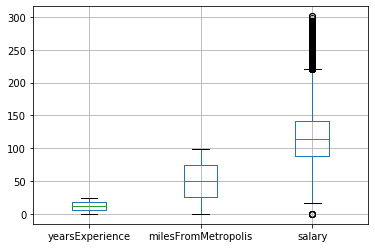

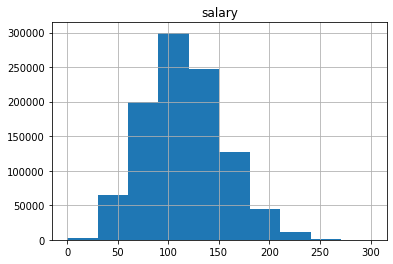

In [74]:
#create boxplot for each numeric columns
numeric.boxplot()
#observation: some outliers in salary
#plot the distribution of salary
numeric.hist("salary")
#exam the extreme values in salary
training[training["salary"]<20]
#remove salary==0
training = training[training.salary>0]
print(len(training))
training['salary'].value_counts().sort_index().head(20)
#observation: exam the validity of salary = 17, 18, 19 because there are 10 or less records
training[training["salary"]<20]
#observation, the jobType is all janitor, with low education, so the values are reasonable.

In [ ]:
#look for correlation between each feature and the target

#look for correlation between features

--- 5. Establish a baseline ---

In [ ]:
#select a reasonable metric (RMSE)
#create an extremely simple model and measure its efficacy
#e.g. the averaged salary for each industry
#Measure RMSE
#5-fold cross-validation

--- 6. Hypothesize Solution ---

choose three models that may provide better results than the baseline, based on EDA, and explain why
potential new features such as interaction variables, summary statistic for each group.

In [ ]:
#


# Part 3 - DEPOLY
Cycle through creating features, tuning models, and training validating models (step 7-9) until reach the efficacy goal: 320 for senior data scientist

--- 7 Engineer features ---

In [ ]:
#make sure the data is ready for machine learning
#create any new features

--- 8 Create Models ---

In [ ]:
#create and turn the models

--- 9. test models ---

In [ ]:
#do 5-fold cross-validation on models and measure RMSE

--- 10. Select the best model ---

# Part 4 - DEPLOY
--- 11. automate pipeline ---

--- 12. deploy solution ---


In [ ]:
#save results to csv or database
#visualization for models and feature importance

---13. measure efficacy ---